In [1]:
%matplotlib inline
from DELCgen import *
import scipy.stats as st
import matplotlib.pyplot as plt 
from constants import *
from scipy.interpolate import interp1d
import naima
import astropy.units as u
import subroutines as sub
import os

In [2]:
# flux_scales contains the normalisations of our jet power 
# actually the median of the distribution, or the mean in log space.
# betas is the spectral index of the injected spectrum 
#flux_scales = np.logspace(43,45,num=10)
#betas = np.arange(2,3,0.1)
betas = [2,2.3,2.7]
flux_scales = [1e43,1e44]

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.01207812e+64
 9.80680454e+63 9.62444622e+63]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33856047e+65
 3.30986254e+65 3.28035012e+65]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.16250768e+64
 3.12682511e+64 3.08900448e+64]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.27391570e+64
 7.05822840e+64 6.83949485e+64]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.73377789e+64
 6.59181853e+64 6.46309439e+64]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67007720e+63
 4.34047228e+63 4.02040274e+63]


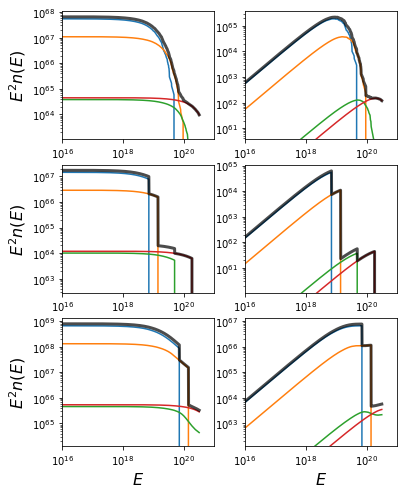

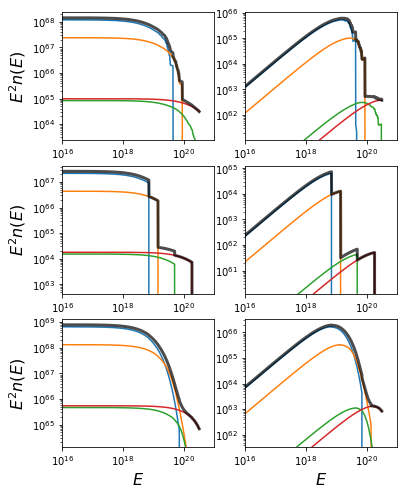

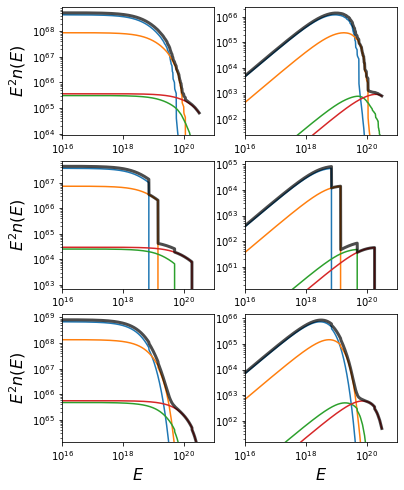

In [13]:
energies = np.logspace(6,20.5,num=3000)
prefixes = ["", "steady_", "tophat_"]
# for i_flux, flux_scale in enumerate(flux_scales):
# for i_beta, BETA in enumerate(betas):
z_elem = [1,2,7,26]        
BETA = 2.0
flux_scale = 1e43
delta_t = 100.0 * 1000.0 * YR
figs = [plt.figure(figsize=(6,8)) for i in range(3)]
times = [-300,-200,-1]

for ifig in range(3):
    fig = figs[ifig]
    TIME = times[ifig]
    for i, p in enumerate(prefixes):
        # load the arrays calculated
        escaping_time = np.load("array_saves/{}escaping_beta{:.1f}q{:.1f}.npy".format(p, BETA, np.log10(flux_scale)))
        ncr_time = np.load("array_saves/{}ncr_beta{:.1f}q{:.1f}.npy".format(p, BETA, np.log10(flux_scale)))

        ax1 = fig.add_subplot(3,2,(2*i)+1)
        ax2 = fig.add_subplot(3,2,(2*i)+2)
        for j, frac in enumerate(z_elem):

            rigidities = energies / z_elem[j]
            sub.plot_spectra(fig, ax1, ax2, rigidities * z_elem[j], ncr_time[j,TIME,:], escaping_time[j,TIME,:]*delta_t, j)
        total_escaping = energies * energies * np.sum(escaping_time, axis=0)[TIME] *delta_t
        total_ncr = energies * energies * np.sum(ncr_time, axis=0)[TIME] 
        print (total_ncr)
        ax1.plot(energies, total_ncr, c="k", lw=3, alpha=0.7)
        ax2.plot(energies, total_escaping, c="k", lw=3, alpha=0.7)
    fig.savefig("comparison{}.png".format(ifig))
    
    

        
    

Set up arrays to loop over. flux_scales contains the normalisations of our jet power $(\bar{Q})$.
This is actually the median of the distribution, or the mean in log space.
betas is the spectral index of the injected spectrum ($\beta$).

Now let's make a movie with ffmpeg (pretty hacky this)